In [43]:
import numpy as np
import matplotlib.pyplot as plt

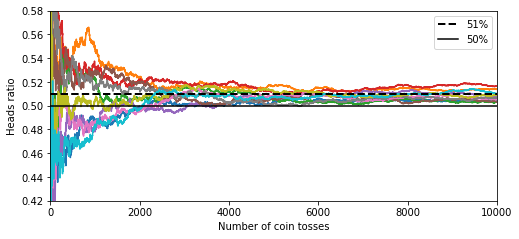

In [44]:
# if you have a biased coin with possibilty if head 51 %
# of the time thenby 10000 iteration the possibility of a heads climbs
# to 75 percent


heads_proba = 0.51
coin_tosses = (np.random.rand(10000,10)< heads_proba).astype(np.int32)
cumulative_heads_ratio = np.cumsum(coin_tosses,axis=0)/ np.arange(1,10001).reshape(-1,1)

plt.figure(figsize=(8,3.5))
plt.plot(cumulative_heads_ratio)
plt.plot([0,10000], [0.51,0.51], "k--", linewidth=2, label="51%")
plt.plot([0,10000], [0.5,0.5], "k-", label="50%")
plt.xlabel("Number of coin tosses")
plt.ylabel("Heads ratio")
plt.legend()
plt.axis([0,10000,0.42,0.58])
plt.show()

In [45]:
print(np.random.rand(10000,10))
print("\n")
print(coin_tosses)
# 10000 coin tosses with 10 independent tosses 
# representing the rows

print("\n")
print(np.cumsum(coin_tosses,axis=0))
#sum over each column
print("\n")
print(np.arange(1,10001))


[[0.26152222 0.99398225 0.35654198 ... 0.15714489 0.71892068 0.47372442]
 [0.58237322 0.2608225  0.9622866  ... 0.20167962 0.35491108 0.18969659]
 [0.66291896 0.30791791 0.27378295 ... 0.1043782  0.67217955 0.30301358]
 ...
 [0.76384073 0.6110018  0.36148402 ... 0.71478703 0.26908825 0.11928002]
 [0.31566993 0.64378432 0.60723178 ... 0.60468456 0.59667051 0.75619291]
 [0.35132751 0.5486523  0.29219933 ... 0.06350719 0.23446505 0.92458926]]


[[0 1 1 ... 1 1 0]
 [0 1 1 ... 1 0 0]
 [1 0 0 ... 0 0 0]
 ...
 [1 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 1]
 [0 0 1 ... 1 1 0]]


[[   0    1    1 ...    1    1    0]
 [   0    2    2 ...    2    1    0]
 [   1    2    2 ...    2    1    0]
 ...
 [5037 5138 5031 ... 5064 5086 5100]
 [5037 5138 5031 ... 5064 5086 5101]
 [5037 5138 5032 ... 5065 5087 5101]]


[    1     2     3 ...  9998  9999 10000]


### making a model

In [1]:
# importing datasets

from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons

X,y = make_moons(n_samples=500,noise=0.30, random_state=42)
X_train,X_test, y_train,y_test = train_test_split(X,y,random_state=42)

In [47]:
# importing random forest classifier

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

log_clf = LogisticRegression(solver="liblinear", random_state=42)
rnd_clf = RandomForestClassifier(n_estimators=10, random_state=42)
svm_clf = SVC(gamma="auto", random_state=42)

voting_clf = VotingClassifier(
    estimators = [('lr', log_clf),('rf',rnd_clf),('svc', svm_clf)],
    voting='hard'
)

In [48]:
voting_clf.fit(X_train,y_train)

VotingClassifier(estimators=[('lr',
                              LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='warn',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=42,
                                                 solver='liblinear', tol=0.0001,
                                                 verbose=0, warm_start=False)),
                             ('rf',
                              RandomForestClassifier(bootstrap=True,
                                                     class_weight=None,
                                                     criterion='gin...
                                        

In [49]:
from sklearn.metrics import accuracy_score
for clf in (log_clf,rnd_clf,svm_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.864
RandomForestClassifier 0.872
SVC 0.888
VotingClassifier 0.896


In [50]:
# soft voting

log_clf = LogisticRegression(solver="liblinear", random_state=42)
# wwhat is liblinear
rnd_clf = RandomForestClassifier(n_estimators=10, random_state=42)
svm_clf = SVC(gamma="auto", probability=True, random_state=42)

voting_clf = VotingClassifier(
    estimators = [('lr', log_clf), ('rf', rnd_clf), ('svc',svm_clf)],
    voting='soft'
)

voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('lr',
                              LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='warn',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=42,
                                                 solver='liblinear', tol=0.0001,
                                                 verbose=0, warm_start=False)),
                             ('rf',
                              RandomForestClassifier(bootstrap=True,
                                                     class_weight=None,
                                                     criterion='gin...
                                        

In [51]:
from sklearn.metrics import accuracy_score

for clf in (log_clf, rnd_clf, svm_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.864
RandomForestClassifier 0.872
SVC 0.888
VotingClassifier 0.912


### Bagging ensembles

In [52]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

bag_clf = BaggingClassifier(
    DecisionTreeClassifier(random_state=42), n_estimators=500,
    max_samples=100, bootstrap=True, n_jobs=-1, random_state=42
)

bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)

In [53]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

0.904


In [54]:
# comparing with a decsiion tree
tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train,y_train)
y_pred_tree = tree_clf.predict(X_test)
print(accuracy_score(y_test, y_pred_tree))

0.856


In [55]:
from matplotlib.colors import ListedColormap

def plot_decision_boundary(clf, X, y, axes=[-1.5,2.5,-1,1.5], alpha=0.5, contour=True):
    x1s = np.linspace(axes[0],axes[1],100)
    x2s = np.linspace(axes[2],axes[3],100)
    x1, x2 = np.meshgrid(x1s,x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(["#fafab0", "#9898ff", "#a0faa0"])
    plt.contour(x1,x2,y_pred,alpha=0.3, cmap=custom_cmap)
    if contour:
        custom_cmap2 = ListedColormap(["#7d7d58", "#4c4c7f", "#507d50"])
        plt.contour(x1, x2, y_pred,cmap=custom_cmap2, alpha=0.8)
    plt.plot(X[:,0][y==0], X[:,1][y==0],"yo", alpha=alpha)
    plt.plot(X[:,0][y==1], X[:,1][y==1], "bs",alpha=alpha)
    plt.axis(axes)
    plt.xlabel(r"$x_1$",fontsize=18)
    plt.ylabel(r"$x_2$", fontsize=18, rotation=0)
    

[-1.5 -0.5  0.5  1.5  2.5]
[array([[-1.5, -0.5,  0.5,  1.5,  2.5],
       [-1.5, -0.5,  0.5,  1.5,  2.5],
       [-1.5, -0.5,  0.5,  1.5,  2.5],
       [-1.5, -0.5,  0.5,  1.5,  2.5],
       [-1.5, -0.5,  0.5,  1.5,  2.5]]), array([[-1.   , -1.   , -1.   , -1.   , -1.   ],
       [-0.375, -0.375, -0.375, -0.375, -0.375],
       [ 0.25 ,  0.25 ,  0.25 ,  0.25 ,  0.25 ],
       [ 0.875,  0.875,  0.875,  0.875,  0.875],
       [ 1.5  ,  1.5  ,  1.5  ,  1.5  ,  1.5  ]])]
(5, 5)


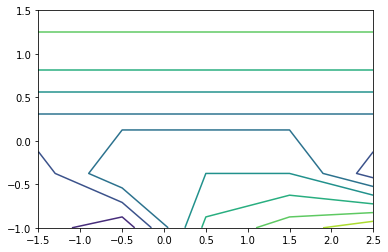

In [56]:
# axes = [-1.5,2.5,-1,1.5]
# x1s = np.linspace(axes[0], axes[1],5)
# x2s = np.linspace(-1,1.5, 5)
# print(x1s)
# print(np.meshgrid(x1s, x2s))
# x1, x2 = np.meshgrid(x1s, x2s)
# print(x1.shape)
# #print(x2) # x2s.T * 5
# #print(x2s)

# y = [[2,1,5,6,7],[2,4,4,4,2], [3,3,3,3,3],[5,5,5,5,5],[6,6,6,6,6]]
# plt.contour(x1,x2,y)
# # didn't quite get it

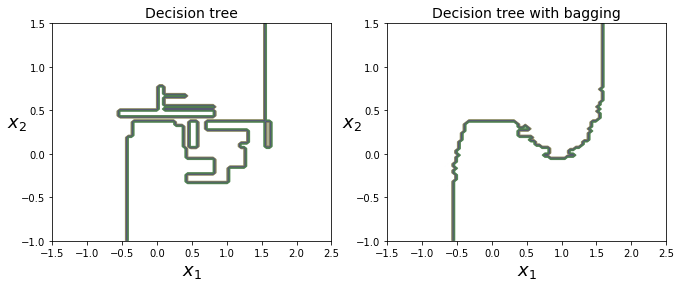

In [57]:
plt.figure(figsize=(11,4))
plt.subplot(121)
plot_decision_boundary(tree_clf,X,y)
plt.title("Decision tree", fontsize=14)
plt.subplot(122)
plot_decision_boundary(bag_clf, X, y)
plt.title("Decision tree with bagging", fontsize=14)
plt.show()

### oob evalation

In [58]:
bag_clf = BaggingClassifier(
    DecisionTreeClassifier(), n_estimators=500, bootstrap=True, n_jobs=-1, oob_score=True
)

bag_clf.fit(X_train, y_train)
bag_clf.oob_score_

0.8986666666666666

In [59]:
from sklearn.metrics import accuracy_score
y_pred = bag_clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.904

In [60]:
bag_clf.oob_decision_function_
# shows class probailities

array([[0.39247312, 0.60752688],
       [0.32994924, 0.67005076],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.11666667, 0.88333333],
       [0.33333333, 0.66666667],
       [0.00571429, 0.99428571],
       [0.98324022, 0.01675978],
       [0.98395722, 0.01604278],
       [0.80555556, 0.19444444],
       [0.        , 1.        ],
       [0.77956989, 0.22043011],
       [0.80203046, 0.19796954],
       [0.95959596, 0.04040404],
       [0.05759162, 0.94240838],
       [0.00549451, 0.99450549],
       [0.97237569, 0.02762431],
       [0.96153846, 0.03846154],
       [0.99494949, 0.00505051],
       [0.02777778, 0.97222222],
       [0.30319149, 0.69680851],
       [0.90952381, 0.09047619],
       [1.        , 0.        ],
       [0.97802198, 0.02197802],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [0.63043478, 0.36956522],
       [0.

### Random forest

In [63]:
from sklearn.ensemble import RandomForestClassifier

rnd_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, n_jobs=-1)

# this is quivalent
bag_clf = BaggingClassifier(
    DecisionTreeClassifier(splitter="random", max_leaf_nodes=16),
                           n_estimators=500, max_samples=1.0, bootstrap=True, n_jobs=-1)

rnd_clf.fit(X_train, y_train)

y_pred_rf = rnd_clf.predict(X_test)

In [64]:
np.sum(y_pred == y_pred_rf) / len(y_pred)

0.936

In [65]:
### using on iris dataset

from sklearn.datasets import load_iris
iris = load_iris()

rnd_clf = RandomForestClassifier(n_estimators=500, n_jobs=-1, random_state=42)
rnd_clf.fit(iris["data"], iris["target"])
for name, score, in zip(iris["feature_names"], rnd_clf.feature_importances_):
    print(name, score)

sepal length (cm) 0.11249225099876375
sepal width (cm) 0.02311928828251033
petal length (cm) 0.4410304643639577
petal width (cm) 0.4233579963547682


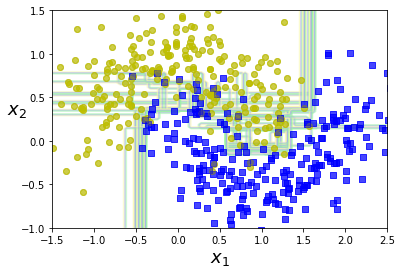

In [69]:
plt.figure(figsize=(6, 4))

for i in range(15):
    tree_clf = DecisionTreeClassifier(max_leaf_nodes=16, random_state=42 + i)
    indices_with_replacement = np.random.randint(0, len(X_train), len(X_train))
    tree_clf.fit(X[indices_with_replacement], y[indices_with_replacement])
    plot_decision_boundary(tree_clf, X, y, axes=[-1.5, 2.5, -1, 1.5], alpha=0.08, contour=False)

plt.show()

In [70]:
### Feature importance

In [75]:
from sklearn.datasets import fetch_openml
mnist =fetch_openml('mnist_784', version=1)
mnist.target = mnist.target.astype(np.int64)

In [76]:
rnd_clf = RandomForestClassifier(n_estimators=10,random_state=42)
rnd_clf.fit(mnist["data"], mnist["target"])

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [79]:
import matplotlib as mpl

def plot_digit(data):
    image = data.reshape(28,28)
    plt.imshow(image,cmap=mpl.cm.hot, interpolation="nearest")
    plt.axis("off")


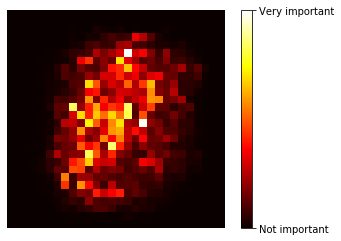

In [81]:
plot_digit(rnd_clf.feature_importances_)

cbar = plt.colorbar(ticks=[rnd_clf.feature_importances_.min(), rnd_clf.feature_importances_.max()])
cbar.ax.set_yticklabels(['Not important', 'Very important'])

plt.show()


### Adaboost

In [83]:
from sklearn.ensemble import AdaBoostClassifier

ada_clf = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1), n_estimators=200,
    algorithm="SAMME.R", learning_rate=0.5, random_state=42
)

ada_clf.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(class_weight=None,
                                                         criterion='gini',
                                                         max_depth=1,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort=False,
                                                         random_state=None,
                             

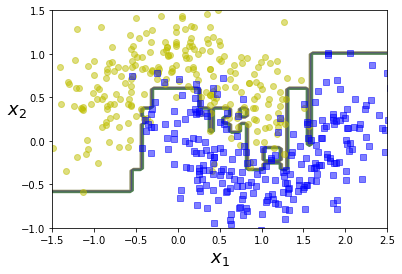

In [86]:
plot_decision_boundary(ada_clf,X, y)

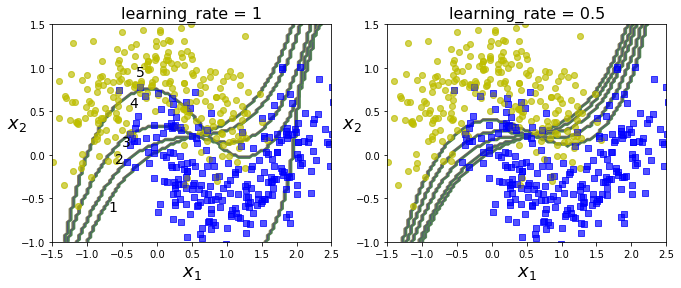

In [88]:
m = len(X_train)

plt.figure(figsize=(11,4))

for subplot, learning_rate in ((121,1),(122,0.5)):
    sample_weights = np.ones(m)
    plt.subplot(subplot)
    
    for i in range(5):
        svm_clf = SVC(kernel="rbf", C=0.05, gamma="auto", random_state=42)
        svm_clf.fit(X_train, y_train, sample_weight=sample_weights)
        y_pred = svm_clf.predict(X_train)
        sample_weights[y_pred != y_train] *= 1 + learning_rate
        plot_decision_boundary(svm_clf, X, y, alpha=0.2)
        plt.title("learning_rate = {}".format(learning_rate), fontsize=16)
    if subplot == 121:
        plt.text(-0.7, -0.65,"1", fontsize=14)
        plt.text(-0.6, -0.10, "2", fontsize=14)
        plt.text(-0.5, 0.10, "3", fontsize=14)
        plt.text(-0.4, 0.55, "4", fontsize=14)
        plt.text(-0.3, 0.90,"5", fontsize=14)
    
plt.show()

In [89]:
list(m for m in dir(ada_clf) if not m.startswith("_") and m.endswith("_"))

['base_estimator_',
 'classes_',
 'estimator_errors_',
 'estimator_weights_',
 'estimators_',
 'feature_importances_',
 'n_classes_']

### Gradient boosting

In [14]:
np.random.seed(42)
X = np.random.rand(100, 1) - 0.5
y = 3*X[:, 0]**2 + 0.05 * np.random.randn(100)
# its a 2d array
print(X[:])

# print the array at once
print(X[:,0])

[[-0.12545988]
 [ 0.45071431]
 [ 0.23199394]
 [ 0.09865848]
 [-0.34398136]
 [-0.34400548]
 [-0.44191639]
 [ 0.36617615]
 [ 0.10111501]
 [ 0.20807258]
 [-0.47941551]
 [ 0.46990985]
 [ 0.33244264]
 [-0.28766089]
 [-0.31817503]
 [-0.31659549]
 [-0.19575776]
 [ 0.02475643]
 [-0.06805498]
 [-0.20877086]
 [ 0.11185289]
 [-0.36050614]
 [-0.20785535]
 [-0.13363816]
 [-0.04393002]
 [ 0.28517596]
 [-0.30032622]
 [ 0.01423444]
 [ 0.09241457]
 [-0.45354959]
 [ 0.10754485]
 [-0.32947588]
 [-0.43494841]
 [ 0.44888554]
 [ 0.46563203]
 [ 0.30839735]
 [-0.19538623]
 [-0.40232789]
 [ 0.18423303]
 [-0.05984751]
 [-0.37796177]
 [-0.00482309]
 [-0.46561148]
 [ 0.4093204 ]
 [-0.24122002]
 [ 0.16252228]
 [-0.18828892]
 [ 0.02006802]
 [ 0.04671028]
 [-0.31514554]
 [ 0.46958463]
 [ 0.27513282]
 [ 0.43949894]
 [ 0.39482735]
 [ 0.09789998]
 [ 0.42187424]
 [-0.4115075 ]
 [-0.30401714]
 [-0.45477271]
 [-0.17466967]
 [-0.11132271]
 [-0.22865097]
 [ 0.32873751]
 [-0.14324667]
 [-0.21906549]
 [ 0.04269608]
 [-0.35907

In [7]:
from sklearn.tree import DecisionTreeRegressor

tree_reg1 = DecisionTreeRegressor(max_depth=1)
tree_reg1.fit(X,y)

y2 = y - tree_reg1.predict(X)
tree_reg2 = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg2.fit(X, y2)

y3 = y2 - tree_reg2.predict(X)
tree_reg3 = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg3.fit(X, y3)


DecisionTreeRegressor(criterion='mse', max_depth=2, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=42, splitter='best')

In [8]:
import numpy as np

X_new = np.array([[0.8]])

In [9]:
y_pred = sum(tree.predict(X_new) for tree in (tree_reg1, tree_reg2, tree_reg3))
print(y_pred)

[0.62505246]


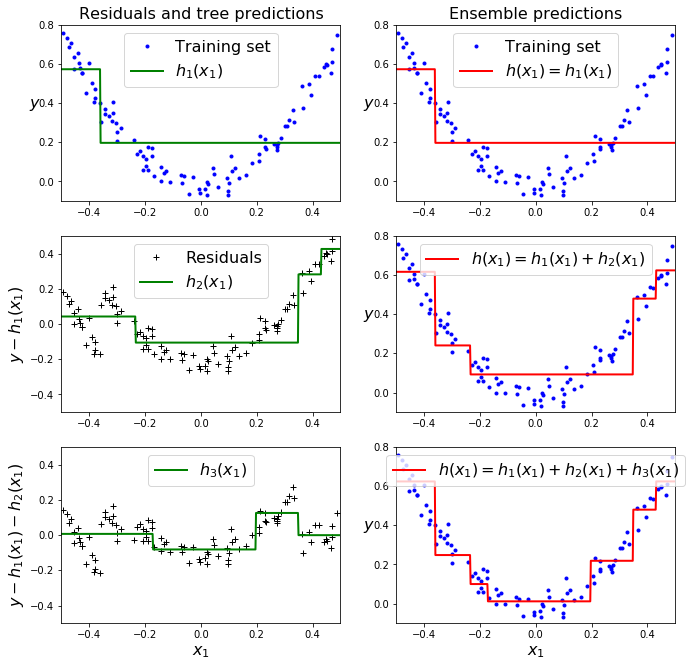

In [19]:
import matplotlib.pyplot as plt

def plot_predictions(regressors, X, y, axes, label=None, style="r-", data_style="b.", data_label=None):
    x1 = np.linspace(axes[0], axes[1], 500)
    y_pred = sum(regressor.predict(x1.reshape(-1, 1)) for regressor in regressors)
    plt.plot(X[:, 0], y, data_style, label=data_label)
    plt.plot(x1, y_pred, style, linewidth=2, label=label)
    if label or data_label:
        plt.legend(loc="upper center", fontsize=16)
    plt.axis(axes)

plt.figure(figsize=(11,11))

plt.subplot(321)
plot_predictions([tree_reg1], X, y, axes=[-0.5, 0.5, -0.1, 0.8], label="$h_1(x_1)$", style="g-", data_label="Training set")
plt.ylabel("$y$", fontsize=16, rotation=0)
plt.title("Residuals and tree predictions", fontsize=16)

plt.subplot(322)
plot_predictions([tree_reg1], X, y, axes=[-0.5, 0.5, -0.1, 0.8], label="$h(x_1) = h_1(x_1)$", data_label="Training set")
plt.ylabel("$y$", fontsize=16, rotation=0)
plt.title("Ensemble predictions", fontsize=16)

plt.subplot(323)
plot_predictions([tree_reg2], X, y2, axes=[-0.5, 0.5, -0.5, 0.5], label="$h_2(x_1)$", style="g-", data_style="k+", data_label="Residuals")
plt.ylabel("$y - h_1(x_1)$", fontsize=16)

plt.subplot(324)
plot_predictions([tree_reg1, tree_reg2], X, y, axes=[-0.5, 0.5, -0.1, 0.8], label="$h(x_1) = h_1(x_1) + h_2(x_1)$")
plt.ylabel("$y$", fontsize=16, rotation=0)

plt.subplot(325)
plot_predictions([tree_reg3], X, y3, axes=[-0.5, 0.5, -0.5, 0.5], label="$h_3(x_1)$", style="g-", data_style="k+")
plt.ylabel("$y - h_1(x_1) - h_2(x_1)$", fontsize=16)
plt.xlabel("$x_1$", fontsize=16)

plt.subplot(326)
plot_predictions([tree_reg1, tree_reg2, tree_reg3], X, y, axes=[-0.5, 0.5, -0.1, 0.8], label="$h(x_1) = h_1(x_1) + h_2(x_1) + h_3(x_1)$")
plt.xlabel("$x_1$", fontsize=16)
plt.ylabel("$y$", fontsize=16, rotation=0)

plt.show()

In [22]:
## showin affect of no. of tree on GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingRegressor

gbrt = GradientBoostingRegressor(max_depth=2,n_estimators=3,learning_rate=1.0, random_state=42)
gbrt.fit(X,y)


GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=1.0, loss='ls', max_depth=2,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=3,
                          n_iter_no_change=None, presort='auto',
                          random_state=42, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [23]:
gbrt_slow = GradientBoostingRegressor(max_depth=2, n_estimators=200, learning_rate=0.1, random_state=42)
gbrt_slow.fit(X,y)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=2,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=200,
                          n_iter_no_change=None, presort='auto',
                          random_state=42, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

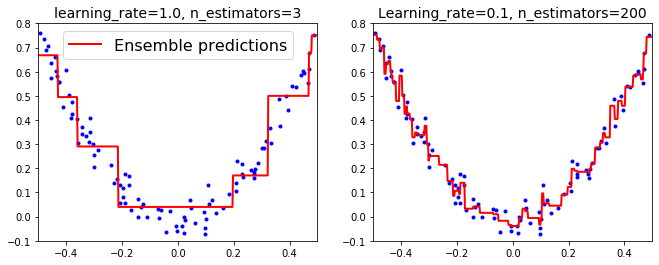

In [25]:
plt.figure(figsize=(11,4))

plt.subplot(121)
plot_predictions([gbrt], X, y,axes=[-0.5,0.5,-0.1,0.8], label="Ensemble predictions")
plt.title("learning_rate={}, n_estimators={}".format(gbrt.learning_rate, gbrt.n_estimators), fontsize=14)

plt.subplot(122)
plot_predictions([gbrt_slow], X,y, axes=[-0.5,0.5,-0.1,0.8])
plt.title("Learning_rate={}, n_estimators={}".format(gbrt_slow.learning_rate, gbrt_slow.n_estimators),fontsize=14)

plt.show()

### gradient boosting with early stopping

In [27]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X_train, X_val, y_train, y_val = train_test_split(X,y,random_state=42)

gbrt = GradientBoostingRegressor(max_depth=2, n_estimators=120, random_state=42)
gbrt.fit(X_train, y_train)

errors = [mean_squared_error(y_val, y_pred)
          for y_pred in gbrt.staged_predict(X_val)]
bst_n_estimators = np.argmin(errors) + 1

gbrt_best = GradientBoostingRegressor(max_depth=2, n_estimators= bst_n_estimators, random_state=42)
gbrt_best.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=2,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=118,
                          n_iter_no_change=None, presort='auto',
                          random_state=42, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [28]:
min_error= np.min(errors)

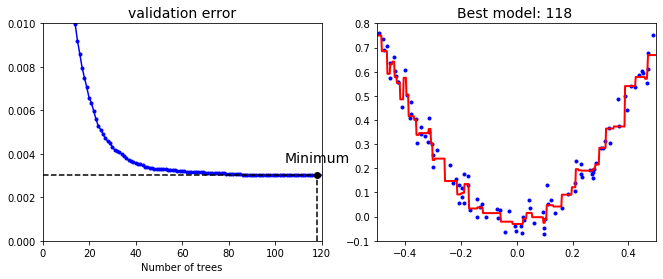

In [32]:
plt.figure(figsize=(11,4))

plt.subplot(121)
plt.plot(errors, "b.-")
plt.plot([bst_n_estimators, bst_n_estimators], [0,min_error], "k--")
plt.plot([0,120], [min_error,min_error],"k--")
plt.plot(bst_n_estimators, min_error, "ko")
plt.text(bst_n_estimators,min_error * 1.2, "Minimum",ha="center",fontsize=14 )
plt.axis([0,120,0,0.01])
plt.xlabel("Number of trees")
plt.title("validation error",fontsize=14)

plt.subplot(122)
plot_predictions([gbrt_best], X,y , axes=[-0.5,0.5,-0.1,0.8])
plt.title("Best model: {} ".format(bst_n_estimators), fontsize=14)

plt.show()

In [33]:
# warm_start =True makse keeps existing trees when fit() method is called
# this allows for incremental learning

gbrt = GradientBoostingRegressor(max_depth=2, warm_start=True,random_state=42)

min_val_error = float("inf")
error_going_up = 0

for n_estimators in range(1,120):
    gbrt.n_estimators = n_estimators
    gbrt.fit(X_train, y_train)
    y_pred = gbrt.predict(X_val)
    val_error = mean_squared_error(y_val, y_pred)
    if(val_error < min_val_error):
        min_val_error = val_error
        error_going_up =0 
    else:
        error_going_up += 1
        if(error_going_up == 5):
            break
            # early stopping


In [34]:
print(gbrt.n_estimators)

105


In [35]:
print(min_val_error)

0.003023701609089896


### XGBoost

In [37]:
!pip install xgboost

In [40]:
import xgboost

xgb_reg = xgboost.XGBRegressor(random_state=42)
xgb_reg.fit(X_train, y_train)
y_pred = xgb_reg.predict(X_val)
val_error = mean_squared_error(y_val, y_pred)
print(val_error)

0.0030701252830088776


In [41]:
xgb_reg.fit(X_train,y_train, eval_set=[(X_val,y_val)],early_stopping_rounds=2)
y_pred = xgb_reg.predict(X_val)
val_error = mean_squared_error(y_val,y_pred)
print(val_error)

[0]	validation_0-rmse:0.19678
Will train until validation_0-rmse hasn't improved in 2 rounds.
[1]	validation_0-rmse:0.14325
[2]	validation_0-rmse:0.10835
[3]	validation_0-rmse:0.08482
[4]	validation_0-rmse:0.07044
[5]	validation_0-rmse:0.06255
[6]	validation_0-rmse:0.05927
[7]	validation_0-rmse:0.05698
[8]	validation_0-rmse:0.05519
[9]	validation_0-rmse:0.05513
[10]	validation_0-rmse:0.05473
[11]	validation_0-rmse:0.05463
[12]	validation_0-rmse:0.05427
[13]	validation_0-rmse:0.05376
[14]	validation_0-rmse:0.05377
[15]	validation_0-rmse:0.05363
[16]	validation_0-rmse:0.05358
[17]	validation_0-rmse:0.05387
[18]	validation_0-rmse:0.05386
Stopping. Best iteration:
[16]	validation_0-rmse:0.05358

0.002870651053050432


In [42]:
# COMPARING TIMES OF XGBOOST AND GRADIENT BOOST
%timeit xgboost.XGBRegressor().fit(X_train,y_train) if xgboost is not None else None

15.4 ms ± 609 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [44]:
%timeit GradientBoostingRegressor().fit(X_train, y_train)

10.9 ms ± 197 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
